<a href="https://colab.research.google.com/github/Psubrat98/ML-Projects-With-Python/blob/main/Deep%20Learning/MY%20Project/Solar%20PV%20Panel/Untitled18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.8/dist-packages/tensorflow/python/client/session.py:1768: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
train_path = '/content/drive/MyDrive/ML Project/Solar Pv Module/My Test set 1/train'
valid_path = '/content/drive/MyDrive/ML Project/Solar Pv Module/My Test set 1/val'

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 0s 0us/step


In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [8]:
 # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/ML Project/Solar Pv Module/My Test set 1/train/*')

In [9]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ML Project/Solar Pv Module/My Test set 1/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 244 images belonging to 3 classes.


In [16]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ML Project/Solar Pv Module/My Test set 1/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 26 images belonging to 3 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-17-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
8/8 [==============================] - 81s 9s/step - loss: 3.3758 - accuracy: 0.3525 - val_loss: 3.5440 - val_accuracy: 0.3077
Epoch 2/20
8/8 [==============================] - 46s 6s/step - loss: 2.6864 - accuracy: 0.3361 - val_loss: 2.0955 - val_accuracy: 0.6923
Epoch 3/20
8/8 [==============================] - 45s 6s/step - loss: 1.7740 - accuracy: 0.3975 - val_loss: 1.1594 - val_accuracy: 0.3846
Epoch 4/20
8/8 [==============================] - 46s 6s/step - loss: 1.1795 - accuracy: 0.3730 - val_loss: 0.9591 - val_accuracy: 0.3846
Epoch 5/20
8/8 [==============================] - 50s 6s/step - loss: 1.0735 - accuracy: 0.4262 - val_loss: 0.8759 - val_accuracy: 0.6923
Epoch 6/20
8/8 [==============================] - 45s 6s/step - loss: 1.0899 - accuracy: 0.4672 - val_loss: 1.5698 - val_accuracy: 0.3846
Epoch 7/20
8/8 [==============================] - 45s 6s/step - loss: 1.2195 - accuracy: 0.4057 - val_loss: 0.7227 - val_accuracy: 0.6923
Epoch 8/20
8/8 [==================

In [18]:
import matplotlib.pyplot as plt

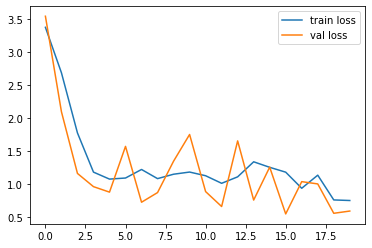

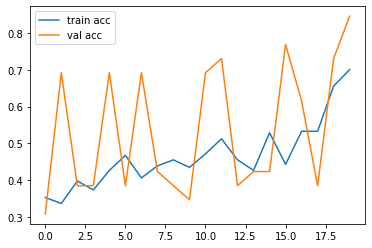

<Figure size 432x288 with 0 Axes>

In [19]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [20]:
from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [21]:
y_pred = model.predict(test_set)

1/1 [==============================] - 6s 6s/step


In [22]:
y_pred

array([[4.8702455e-01, 4.0771533e-02, 4.7220391e-01],
       [5.7446313e-01, 2.5332388e-02, 4.0020451e-01],
       [5.8670282e-01, 2.2385817e-02, 3.9091137e-01],
       [3.9241946e-01, 4.7943389e-01, 1.2814663e-01],
       [5.7101071e-01, 2.5003284e-02, 4.0398616e-01],
       [3.9099926e-01, 1.5886866e-02, 5.9311390e-01],
       [4.3052170e-01, 2.2796288e-02, 5.4668206e-01],
       [3.4108785e-01, 5.5993629e-01, 9.8975986e-02],
       [4.3005002e-01, 4.5306876e-01, 1.1688126e-01],
       [4.6615666e-01, 2.6349999e-02, 5.0749338e-01],
       [4.4365191e-01, 2.2930562e-02, 5.3341752e-01],
       [4.0300065e-01, 4.8821992e-01, 1.0877948e-01],
       [4.0915841e-01, 4.6595615e-01, 1.2488540e-01],
       [3.3514401e-01, 5.6452578e-01, 1.0033020e-01],
       [2.4835980e-02, 1.2740267e-04, 9.7503674e-01],
       [6.0271192e-01, 3.9481003e-02, 3.5780704e-01],
       [5.7472032e-01, 3.3436708e-02, 3.9184299e-01],
       [6.1135334e-01, 2.6082983e-02, 3.6256364e-01],
       [5.1555818e-01, 5.577

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([0, 0, 0, 1, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2,
       2, 2, 2, 1])

label 0 : PV module with drop dust paticles
label 1 : PV module with less dust paticles
label 2 : PV module with more dust paticles